# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div><div class="lev3 toc-item"><a href="#Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:" data-toc-modified-id="Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверить работу реализованного алгоритма с различным числом кластеров:</a></div><div class="lev3 toc-item"><a href="#За-выполнение-ДЗ:" data-toc-modified-id="За-выполнение-ДЗ:-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>За выполнение ДЗ:</a></div>

In [1]:
import numpy as np
import pylab
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Задание:

Реализовать алгоритм кластеризации k-means

In [93]:
class KMeans:
    def __init__(self, n_clusters=2, metric='euclidean', max_iter=300):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter
        if metric[:1] =='m': #манхэттен
            self.distance = self.distance_m
        elif metric[:1] == 'c': #чебышев
            self.distance = self.distance_c
        else: #евклид
            self.distance = self.distance_e

    @staticmethod
    def distance_e(vector1, vector2): #евклид
        vector = (vector1 - vector2)**2
        sqrdist = np.sum(vector)
        return sqrdist**0.5
    
    
    @staticmethod
    def distance_c(vector1, vector2): #чебышев
        return np.max(np.absolute(vector1 - vector2))
    
    
    @staticmethod
    def distance_m(vector1, vector2): #манхэттен
        return np.sum(np.absolute(vector1 - vector2))
        
    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        X = np.array(X)
        disttocenter = np.zeros((X.shape[0], self.n_clusters))
        #i-ая строчка = iый объект. j-ый столбец = расстояние до центра jого кластера
        for i in range(disttocenter.shape[0]):
            for j in range(disttocenter.shape[1]):
                disttocenter[i,j] = self.distance(X[i,:], self.centers[j, :])
        
        return np.argmin(disttocenter, axis=1)
    

    def fit(self, X):  
        '''
        Шаг 1 - Инизиализируем начальные положения центров кластеров
        '''
        X = np.array(X)
        
        """
        NUniform = np.random.rand(self.n_clusters, X.shape[1])
        centers = NUniform * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
        
        # в centers лежат случайные точки N мерного пространства в пределах [min_i, max_i] для каждой компоненты
        # на iой строчке лежат компоненты iого кластера
        # плохой вариант, т.к. может в самом начале "сдохнуть" один из кластеров
        """
        NPoints = np.random.permutation(np.arange(X.shape[0]))[:self.n_clusters]
        centers = np.array(X[NPoints], dtype=np.float64)
        #выбрали центрами наших кластеров на 0 шаге случайные точки из X
        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        for step in range(self.max_iter):            
            '''
            Шаг 2.1 - Вычисляем расстояние до цетров кластеров
            '''
            disttocenter = np.zeros((X.shape[0], self.n_clusters))
            #i-ая строчка = iый объект. j-ый столбец = расстояние до центра jого кластера
            """for i in range(disttocenter.shape[0]):
                for j in range(disttocenter.shape[1]):
                    disttocenter[i,j] = self.distance(X[i,:], centers[j, :])
            """
            
            disttocenter = [self.distance(X[i,:], centers[j, :]) for i in range(disttocenter.shape[0]) for j in range(disttocenter.shape[1])]
            disttocenter = np.reshape(disttocenter, (X.shape[0], self.n_clusters))
            #print(step) #для всяких мегаздоровых выборок (или изображений)
            '''
            Шаг 2.2 - Для каждого объекта находим argmin от расстояний до центров
            '''
            prevnearestcluster = nearestcluster if step != 0 else np.eye(1)
            nearestcluster = np.argmin(disttocenter, axis=1)
            if np.array_equal(prevnearestcluster, nearestcluster):
                break
            '''
            Шаг 2.3 - Уточняеням положения центров кластеров
            '''
            for i in range(centers.shape[0]):
                centers[i] = np.sum(X[nearestcluster == i,:],axis=0) / nearestcluster[nearestcluster==i].shape[0] if nearestcluster[nearestcluster==i].shape[0]!=0 else centers[i]
            #print(centers)
            
        '''
        Шаг 3 - Сохраняем положения центров кластеров
        ''' 
        self.centers = centers
        
        '''
        Шаг 4 - Возвращяем предсказание
        '''        
        return self.predict(X)

### Проверить работу реализованного алгоритма с различным числом кластеров:
* Для тестовых наборов данных (dataset1, dataset2, dataset3)
* Для задачи кластеризации цветов на изображении (пример в k-means_photo_clusterization)

### За выполнение ДЗ: 
* 6 баллов за реализацию алгоритма
* +2 балла за возможность выбора метрики
    - Евклидово расстояние
    - Расстояние Чебышева
    - Манхэттенское расстояние

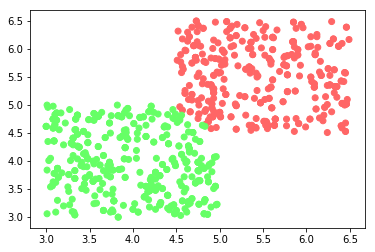

In [94]:
km1 = KMeans(n_clusters=2, metric ='e')
data1=pd.read_csv('dataset1.csv', header=None, sep='\t')
clusters1 = km1.fit(data1)
#добавил до 5 цветов. можно рандомом было равномерным распределением больше фигакнуть, но мне лениво
allcolors = ([0.4,1,0.4],[1,0.4,0.4],[0.1,0.8,1],[1, 1, 0.5], [0, 0, 1])
colors = ([allcolors[i] for i in clusters1])
plt.scatter(data1.loc[:,0],data1.loc[:,1], c=colors)

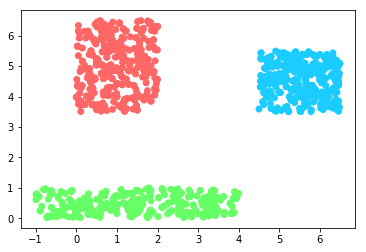

In [95]:
km2 = KMeans(n_clusters=3, metric='c')
data2=pd.read_csv('dataset2.csv', header=None, sep='\t')
clusters2 = km2.fit(data2)
colors = ([allcolors[i] for i in clusters2])
plt.scatter(data2.loc[:,0],data2.loc[:,1], c=colors)

'\nлегко заметить, что методом kmeans кластеризацию логичную с точки зрения моего кластерического мировоззрения провести невозможно\n'

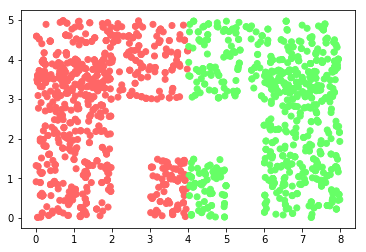

In [96]:
km3 = KMeans(n_clusters=2, metric='m')
data3=pd.read_csv('dataset3.csv', header=None, sep='\t')
clusters3 = km3.fit(data3)
colors = ([allcolors[i] for i in clusters3])
plt.scatter(data3.loc[:,0],data3.loc[:,1], c=colors)
"""интересно заметить, что только при использовании расстояния манхэттена получаются условные лини разделяющие 
наш класс параллельные то одной, то другой оси координат"""
"""
легко заметить, что методом kmeans кластеризацию логичную с точки зрения моего кластерического мировоззрения провести невозможно
"""

In [97]:
import matplotlib.image as mpimg
image = mpimg.imread('./mailru.jpg')

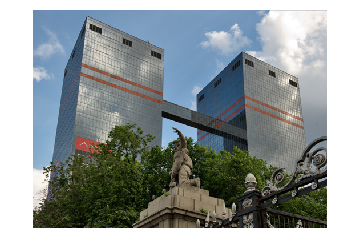

In [98]:
plt.axis("off")
plt.imshow(image)
plt.show()

In [99]:
data = image.reshape((image.shape[0]*image.shape[1],3))

In [100]:
kmeans4 = KMeans(n_clusters=4)
proc_data = kmeans4.fit(data)


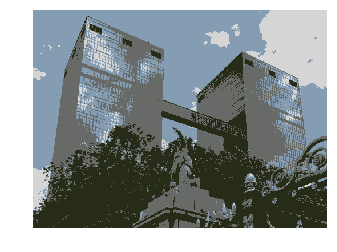

In [101]:
new_image = []
for cluster in proc_data:
    new_image.append(kmeans4.centers[cluster])
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))
plt.axis("off")
plt.imshow(new_image)
plt.show()